In [ ]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table


import seaborn as seabornInstance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
from tabulate import tabulate
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", message="Variables are collinear")

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# PREPARE DATASET 1 **Player Auction data**

In [ ]:
auction = pd.read_csv('all_sold_player_auction_2023_espn.csv',  encoding='windows-1252')

In [ ]:
auction.head(5)

,team,base_price,id,name,overseas,retained,role,sold_price,team_id
0,GT,NaN,1048739,R Sai Kishore,0,1,bowler,30000000,6904
1,KKR,2000000.0,1048813,Narayan Jagadeesan,0,0,batsman,9000000,4341
2,RCB,2000000.0,1048867,Sonu Yadav,0,0,all-rounder,2000000,4340
3,RCB,2000000.0,1057399,Manoj Bhandage,0,0,all-rounder,2000000,4340
4,CSK,2000000.0,1059570,Ajay Mandal,0,0,all-rounder,2000000,4343


In [ ]:
match_score = pd.read_csv('IPL2023_Match_Scoreboard.csv',  encoding='windows-1252')

# PREPARE DATASET 3 **Matches**
Latent variable - man of the match

In [ ]:
matches = pd.read_csv('IPL2023_Matches.csv', encoding='windows-1252')

In [ ]:
match_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_no           70 non-null     int64  
 1   Home_team_run      70 non-null     int64  
 2   Home_team_wickets  70 non-null     int64  
 3   Home_team_over     70 non-null     float64
 4   Away_team_run      70 non-null     int64  
 5   Away_team_wickets  70 non-null     int64  
 6   Away_team_over     70 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 4.0 KB


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_no          70 non-null     int64 
 1   city              70 non-null     object
 2   date_of_match     70 non-null     object
 3   venue             70 non-null     object
 4   Home_team         70 non-null     object
 5   Away_team         70 non-null     object
 6   toss_winner       70 non-null     object
 7   winner            70 non-null     object
 8   man_of_the_match  70 non-null     object
 9   result            70 non-null     object
 10  result_margin     70 non-null     int64 
 11  eliminator        70 non-null     object
 12  umpire1           70 non-null     object
 13  umpire2           70 non-null     object
dtypes: int64(2), object(12)
memory usage: 7.8+ KB


In [ ]:
matches.head(5)

,match_no,city,date_of_match,venue,Home_team,Away_team,toss_winner,winner,man_of_the_match,result,result_margin,eliminator,umpire1,umpire2
0,1,Ahmedabad,3/31/2023,Narendra Modi Stadium,Gujarat Titans,Chennai Super Kings,Gujarat Titans,Gujarat Titans,Rashid Khan,Wickets,5,N,Nitin Menon,Saiyed Khalid
1,2,Mohali,4/1/2023,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,Punjab Kings,Arshdeep Singh,Runs,7,DLS,Bruce Oxenford,Yeshwant Barde
2,3,Lucknow,4/1/2023,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,Lucknow Super Giants,Mark Wood,Runs,50,N,Anil Kumar Chaudhary,Nikhil Patwardhan
3,4,Hyderabad,4/2/2023,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,Jos Buttler,Runs,72,N,KN Anantha Padmanabhan,Rohan Pandit
4,5,Bengaluru,4/2/2023,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Faf du Plessis,Wickets,8,N,Nitin Menon,Tapan Sharma


In [ ]:
match_score.head()

,match_no,Home_team_run,Home_team_wickets,Home_team_over,Away_team_run,Away_team_wickets,Away_team_over
0,1,182,5,19.2,178,7,20.0
1,2,191,5,20.0,146,7,16.0
2,3,193,6,20.0,143,9,20.0
3,4,131,8,20.0,203,5,20.0
4,5,172,2,16.2,171,7,20.0


In [ ]:
man_of_the_match_counts = matches['man_of_the_match'].value_counts()

# Print the count for each player
print(man_of_the_match_counts)

Yashasvi Jaiswal       4
Marcus Stoinis         3
Shubman Gill           3
Ravindra Jadeja        3
Rinku Singh            2
Suryakumar Yadav       2
Varun Chakaravarthy    2
Cameron Green          2
Devon Conway           2
Virat Kohli            2
Mohit Sharma           2
Nicholas Pooran        2
Rashid Khan            2
Faf du Plessis         2
Jos Buttler            1
Joshua Little          1
Mitchell Marsh         1
Mohammed Shami         1
Draw                   1
Ishan Kishan           1
Matheesha Pathirana    1
Philip Salt            1
Shikhar Dhawan         1
Krunal Pandya          1
Andre Russell          1
Mark Wood              1
Prerak Mankad          1
Prabhsimran Singh      1
Wayne Parnell          1
Rilee Rossouw          1
Devdutt Padikkal       1
Glenn Phillips         1
Abhinav Manohar        1
Axar Patel             1
Ajinkya Rahane         1
Rohit Sharma           1
Ravichandran Ashwin    1
Shardul Thakur         1
Harry Brook            1
Nathan Ellis           1


In [ ]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        243 non-null    object 
 1   base_price  243 non-null    float64
 2   id          243 non-null    int64  
 3   name        243 non-null    object 
 4   overseas    243 non-null    int64  
 5   retained    243 non-null    int64  
 6   role        243 non-null    object 
 7   sold_price  243 non-null    int64  
 8   team_id     243 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 17.2+ KB


In [ ]:
auction.fillna(0, inplace=True)

Focusing on batsmen only

In [ ]:
batsman_auction  = auction[auction['role'] == 'batsman']

In [ ]:
batsman_auction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 1 to 241
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        68 non-null     object 
 1   base_price  68 non-null     float64
 2   id          68 non-null     int64  
 3   name        68 non-null     object 
 4   overseas    68 non-null     int64  
 5   retained    68 non-null     int64  
 6   role        68 non-null     object 
 7   sold_price  68 non-null     int64  
 8   team_id     68 non-null     int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 5.3+ KB


# PREPARE DATASET 2 **Batsman**

In [ ]:
batsmen = pd.read_csv('IPL2023_Batsman.csv',  encoding='windows-1252')
batsmen.head()

,match_no,Batsman,team,Run,Ball,4s,6s,out_by
0,1,Devon Conway,Chennai Super Kings,1,6,0,0,Mohammed Shami
1,1,Ruturaj Gaikwad,Chennai Super Kings,92,50,4,9,Alzarri Joseph
2,1,Moeen Ali,Chennai Super Kings,23,17,4,1,Rashid Khan
3,1,Ben Stokes,Chennai Super Kings,7,6,1,0,Rashid Khan
4,1,Ambati Rayudu,Chennai Super Kings,12,12,0,1,Joshua Little


In [ ]:

df = batsmen

# Group the data by 'Batsman'
grouped = df.groupby('Batsman')

# Calculate the required statistics
result = grouped.agg({
    'Run': 'sum',            # Total runs
    'Ball': 'sum',           # Total balls
    'match_no': 'nunique',   # Matches played (count unique match numbers)
    '4s': 'sum',             # Total 4s
    '6s': 'sum'              # Total 6s
}).reset_index()             # Reset the index to get 'Batsman' as a regular column

# Add a new column 'Not_Out' counting instances of 'Not Out' in 'out_by'
df['Not_Out'] = df['out_by'].apply(lambda x: 1 if x == 'Not Out' else 0)

# Group and sum the 'Not_Out' column for each player
not_out_counts = df.groupby('Batsman')['Not_Out'].sum().reset_index()

# Merge the not_out_counts with the result DataFrame
result = result.merge(not_out_counts, on='Batsman', how='left')
result['Strike_Rate'] = (result['Run'] / result['Ball']) * 100

# Calculate the 'Average' while avoiding division by zero
result['Average'] = result.apply(lambda row: row['Run'] / (row['match_no'] - row['Not_Out']) if (row['match_no'] - row['Not_Out']) != 0 else 0, axis=1)

# Rename columns for clarity
result.rename(columns={'match_no': 'Matches_Played', 'Not_Out': 'Not_Out_Count'}, inplace=True)

# Print the resulting DataFrame
result.head(5)


,Batsman,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average
0,Abdul Basith,1,1,1,0,0,1,100.000000,0.000000
1,Abdul Samad,169,128,8,10,11,4,132.031250,42.250000
2,Abhinav Manohar,114,83,6,6,7,0,137.349398,19.000000
3,Abhishek Sharma,225,157,11,28,6,0,143.312102,20.454545
4,Abishek Porel,33,31,4,1,0,0,106.451613,8.250000


## Adding DB_2 to DB_1 for batsman performance

In [ ]:
batsman_auction_combined_dataset = pd.merge(batsman_auction, result, left_on='name', right_on='Batsman', how='left')

batsman_auction_combined_dataset.head(2)

,team,base_price,id,name,overseas,retained,role,sold_price,team_id,Batsman,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average
0,KKR,2000000.0,1048813,Narayan Jagadeesan,0,0,batsman,9000000,4341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CSK,0.0,1059577,Subhranshu Senapati,0,1,batsman,2000000,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

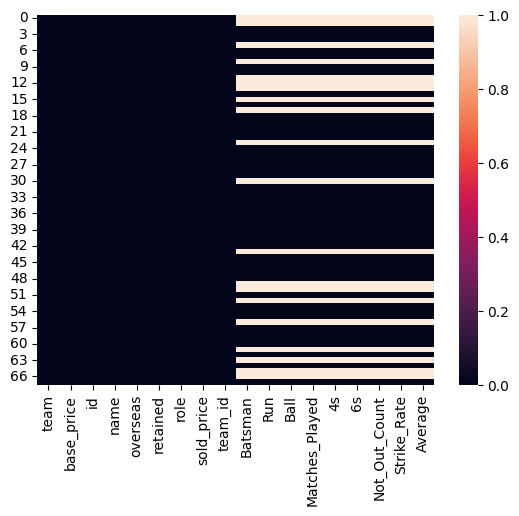

In [ ]:
import seaborn as sb
sb.heatmap(batsman_auction_combined_dataset.isnull())

<Axes: >

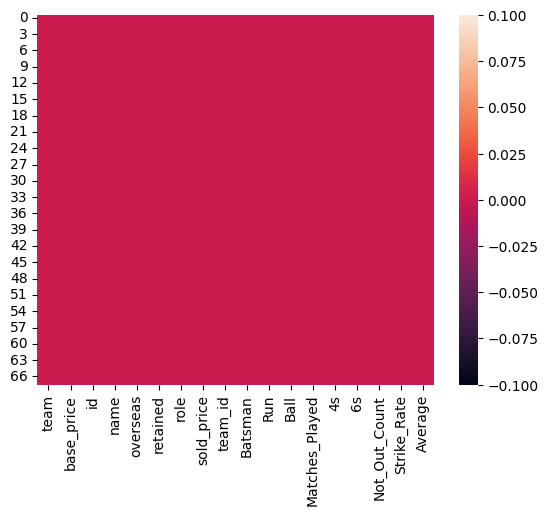

In [ ]:
batsman_auction_combined_dataset.fillna(0, inplace=True)
sb.heatmap(batsman_auction_combined_dataset.isnull())

##Adding Latent variable Man of the Match to batsmen auction

In [ ]:
man_of_the_match_counts_df = man_of_the_match_counts.reset_index()
man_of_the_match_counts_df.columns = ['man_of_the_match', 'man_of_the_match_count']

# Merge the 'batsman' DataFrame with 'man_of_the_match_counts_df' on the synthetic key 'man_of_the_match'


In [ ]:
man_of_the_match_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   man_of_the_match        51 non-null     object
 1   man_of_the_match_count  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [ ]:
batsman_merged_data = pd.merge(batsman_auction_combined_dataset, man_of_the_match_counts_df, left_on='name', right_on='man_of_the_match', how='left')

batsman_merged_data.head(2)

,team,base_price,id,name,overseas,retained,role,sold_price,team_id,Batsman,Run,Ball,Matches_Played,4s,6s,Not_Out_Count,Strike_Rate,Average,man_of_the_match,man_of_the_match_count
0,KKR,2000000.0,1048813,Narayan Jagadeesan,0,0,batsman,9000000,4341,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,CSK,0.0,1059577,Subhranshu Senapati,0,1,batsman,2000000,4343,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
batsman_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team                    68 non-null     object 
 1   base_price              68 non-null     float64
 2   id                      68 non-null     int64  
 3   name                    68 non-null     object 
 4   overseas                68 non-null     int64  
 5   retained                68 non-null     int64  
 6   role                    68 non-null     object 
 7   sold_price              68 non-null     int64  
 8   team_id                 68 non-null     int64  
 9   Batsman                 68 non-null     object 
 10  Run                     68 non-null     float64
 11  Ball                    68 non-null     float64
 12  Matches_Played          68 non-null     float64
 13  4s                      68 non-null     float64
 14  6s                      68 non-null     floa

##Scraping latent variable international rating and ICC ranking of the batsmen

In [ ]:
# data_1 = """1	Suryakumar Yadav	IND	863	910 v New Zealand, 27/01/2023
# 2	Mohammad Rizwan	PAK	787	875 v England, 28/09/2022
# 3	Aiden Markram	 SA	756	796 v England, 06/11/2021
# 4	Babar Azam	 PAK	734	896 v England, 05/05/2019
# 5	Rilee Rossouw	 SA	702	724 v West Indies, 28/03/2023
# 6	Dawid Malan	 ENG	691	915 v South Africa, 01/12/2020
# 7	Muhammad Waseem	 UAE	675	716 v Afghanistan, 19/02/2023
# 8	Jos Buttler	 ENG	666	674 v New Zealand, 10/11/2021
# 9	Aaron Finch	 AUS	660	900 v Zimbabwe, 03/07/2018
# 10	Reeza Hendricks	 SA	657	661 v Australia, 30/08/2023
# 11	Glenn Phillips	 NZ	649	703 v England, 01/11/2022
# 12	Mitchell Marsh	 AUS	645	652 v South Africa, 01/09/2023
# 13	Brandon King	 WI	637	637 v India, 13/08/2023
# 14	Devon Conway	 NZ	636	831 v Australia, 22/10/2022
# 15	Nicholas Pooran	 WI	624	667 v Bangladesh, 07/07/2022
# 16	Quinton de Kock	 SA	622	671 v Sri Lanka, 14/09/2021
# 17	Alex Hales	 ENG	611	866 v India, 07/09/2014
# 18	Pathum Nissanka	 SL	605	698 v Pakistan, 09/09/2022
# 19	Tim Seifert	 NZ	571	685 v Pakistan, 22/12/2020
# 19	Litton Das	 BAN	571	590 v Ireland, 29/03/2023
# 21	Rahmanullah Gurbaz	 AFG	562	620 v Zimbabwe, 17/03/2021
# 22	Finn Allen	 NZ	561	606 v Ireland, 04/11/2022
# 22	Mark Chapman	 NZ	561	561 v England, 05/09/2023
# 24	Richard Berrington	 SCO	557	587 v Oman, 21/10/2021
# 25	Kariyawasa Asalanka	 SL	553	594 v Australia, 11/06/2022
# 25	Virat Kohli	 IND	553	897 v England, 07/09/2014
# 25	Kusal Mendis	 SL	553	559 v New Zealand, 08/04/2023
# 28	George Munsey	 SCO	550	600 v Netherlands, 19/09/2019
# 29	Jonny Bairstow	 ENG	541	624 v South Africa, 27/11/2020
# 30	Harry Brook	 ENG	533	561 v New Zealand, 01/09/2023
# 30	Nazmul Shanto	 BAN	533	593 v England, 14/03/2023
# 32	Paul Stirling	 IRE	531	599 v UAE, 07/10/2021
# 33	David Miller	 SA	529	587 v Sri Lanka, 19/03/2019
# 34	Shubman Gill	 IND	524	573 v West Indies, 12/08/2023
# 35	Rovman Powell	 WI	522	534 v India, 08/08/2023
# 36	Marcus Stoinis	 AUS	518	519 v Afghanistan, 04/11/2022
# 37	Daryl Mitchell	 NZ	517	582 v Sri Lanka, 02/04/2023
# 37	Max O'Dowd	 NED	517	549 v Kenya, 18/10/2019
# 39	Kyle Mayers	 WI	513	513 v India, 13/08/2023
# 40	Glenn Maxwell	 AUS	511	836 v Sri Lanka, 27/10/2019
# 41	Iftikhar Ahmed	 PAK	506	521 v New Zealand, 24/04/2023
# 41	David Warner	 AUS	506	826 v West Indies, 11/05/2010
# 43	Najibullah Zadran	 AFG	503	556 v Ireland, 14/01/2017
# 44	Ibrahim Zadran	 AFG	502	539 v Pakistan, 26/03/2023
# 45	Dasun Shanaka	 SL	499	517 v India, 07/01/2023
# 46	Bhanuka Rajapaksa	 SL	496	543 v England, 05/11/2022
# 46	Lokesh Rahul	 IND	496	854 v England, 03/07/2018
# 48	Rohit Sharma	 IND	493	718 v West Indies, 06/11/2018
# 49	Moeen Ali	 ENG	490	525 v Australia, 12/10/2022
# 50	Hazratullah	 AFG	486	736 v West Indies, 16/11/2019
# 51	Travis Head	 AUS	484	484 v South Africa, 03/09/2023
# 52	Johnson Charles	 WI	482	604 v South Africa, 26/03/2023
# 53	Ben Duckett	 ENG	478	560 v Pakistan, 02/10/2022
# 54	Mohammad Nabi	 AFG	472	569 v Bangladesh, 15/09/2019
# 55	Martin Guptill	 NZ	470	793 v South Africa, 19/02/2012
# 56	Andrew Balbirnie	 IRE	465	523 v Hong Kong, 18/10/2019
# 57	Afif Hossain	 BAN	464	508 v New Zealand, 09/10/2022
# 58	Hardik Pandya	 IND	459	490 v West Indies, 08/08/2023
# 59	N.T. Tilak Varma	 IND	458	509 v West Indies, 13/08/2023
# 59	Gerhard Erasmus	 NAM	458	499 v Ireland, 22/10/2021
# 61	Ishan Kishan	 IND	456	717 v Ireland, 26/06/2022
# 62	Shakib Al Hasan	 BAN	455	618 v Pakistan, 24/04/2015
# 63	Yashasvi Jaiswal	 IND	453	535 v Nepal, 03/10/2023
# 64	Jason Roy	 ENG	449	688 v Sri Lanka, 27/10/2018
# 65	Tony Ura	 PNG	447	563 v Namibia, 20/10/2019
# 66	Kane Williamson	 NZ	441	760 v Bangladesh, 03/01/2017
# 67	Heinrich Klaasen	 SA	436	494 v Ireland, 05/08/2022
# 68	Matthew Wade	 AUS	435	476 v England, 09/10/2022
# 69	Wesley Madhevere	 ZIM	432	514 v Afghanistan, 11/06/2022
# 70	Vriitya Aravind	 UAE	431	472 v New Zealand, 19/08/2023
# 71	Curtis Campher	 IRE	428	428 v India, 20/08/2023
# 72	Tim David	 AUS	425	472 v South Africa, 30/08/2023
# 73	Craig Williams	 NAM	422	477 v Pakistan, 02/11/2021
# 74	Shan Masood	 PAK	420	469 v England, 13/11/2022
# 75	Sikandar Raza	 ZIM	418	431 v India, 06/11/2022
# 75	Sean Williams	 ZIM	418	481 v Ireland, 14/07/2019
# 77	Dhananjaya de Silva	 SL	414	418 v New Zealand, 08/04/2023
# 78	Matthew Short	 AUS	410	439 v South Africa, 01/09/2023
# 78	Temba Bavuma	 SA	410	482 v India, 12/06/2022
# 80	J.J. Smit	 NAM	409	425 v Sri Lanka, 16/10/2022
# 81	Evin Lewis	 WI	406	780 v England, 16/09/2017
# 82	Mahmudullah	 BAN	405	542 v India, 07/11/2019
# 83	Shreyas Iyer	 IND	404	622 v South Africa, 12/06/2022
# 84	Zeeshan Maqsood	 OMA	401	445 v Ireland, 22/02/2022
# 85	Ruturaj Gaikwad	 IND	400	455 v Bangladesh, 06/10/2023
# 86	Shimron Hetmyer	 WI	399	481 v Australia, 06/11/2021
# 87	Aaron Johnson	 CAN	398	447 v Panama, 03/10/2023
# 88	Kusal Perera	 SL	395	751 v South Africa, 22/03/2014
# 89	Craig Ervine	 ZIM	394	424 v Namibia, 17/05/2022
# 90	Mohammad Naim	 BAN	393	617 v Sri Lanka, 24/10/2021
# 90	Colin Ackermann	 NED	393	393 v South Africa, 06/11/2022
# 92	Liam Livingstone	 ENG	392	546 v Pakistan, 18/07/2021
# 93	Stephan Baard	 NAM	389	440 v Uganda, 08/04/2022
# 94	Ryan Burl	 ZIM	387	407 v Ireland, 01/09/2021
# 95	Jatinder Singh	 OMA	385	524 v Bangladesh, 19/10/2021
# 95	Matthew Cross	 SCO	385	478 v Zimbabwe, 17/09/2021
# 97	Josh Inglis	 AUS	382	450 v Pakistan, 05/04/2022
# 98	Fakhar Zaman	 PAK	379	842 v Australia, 08/07/2018
# 99	Jimmy Neesham	 NZ	372	409 v West Indies, 12/08/2022
# 100	Donovan Ferreira	 SA	361	361 v Australia, 03/09/2023"""

In [ ]:
# rows = data_1.split('\n')
# table_data = []
# for row in rows:
#     columns = row.split('\t')
#     if len(columns) == 5:
#         pos, player, team, rating, career_best = columns
#         table_data.append({
#             "POS": int(pos),
#             "PLAYER": player,
#             "TEAM": team,
#             "RATING": int(rating),
#             "CAREER BEST RATING": career_best
#         })

# # Create a DataFrame using pandas
# df = pd.DataFrame(table_data)

# # Display the DataFrame
# print(df)

In [ ]:
# df.to_csv("T20_international_batsman_ranking.csv", index = False)

In [ ]:
t20_batsman_intl_ranking = pd.read_csv('T20_international_batsman_ranking.csv',  encoding='windows-1252')
t20_batsman_intl_ranking.head()

,POS,PLAYER,TEAM,RATING,CAREER BEST RATING
0,1,Suryakumar Yadav,IND,863,"910 v New Zealand, 27/01/2023"
1,2,Mohammad Rizwan,PAK,787,"875 v England, 28/09/2022"
2,3,Aiden Markram,SA,756,"796 v England, 06/11/2021"
3,4,Babar Azam,PAK,734,"896 v England, 05/05/2019"
4,5,Rilee Rossouw,SA,702,"724 v West Indies, 28/03/2023"


In [ ]:
t20_batsman_intl_ranking.shape

(100, 5)

In [ ]:
t20_batsman_intl_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   POS                 100 non-null    int64 
 1   PLAYER              100 non-null    object
 2   TEAM                100 non-null    object
 3   RATING              100 non-null    int64 
 4   CAREER BEST RATING  100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


##Merging ICC ranking and rating of the batsmen

In [ ]:
batsman_merged_ranking_data = pd.merge(batsman_merged_data, t20_batsman_intl_ranking, left_on='name', right_on='PLAYER', how='left')

batsman_merged_ranking_data.head(2)

,team,base_price,id,name,overseas,retained,role,sold_price,team_id,Batsman,...,Not_Out_Count,Strike_Rate,Average,man_of_the_match,man_of_the_match_count,POS,PLAYER,TEAM,RATING,CAREER BEST RATING
0,KKR,2000000.0,1048813,Narayan Jagadeesan,0,0,batsman,9000000,4341,0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CSK,0.0,1059577,Subhranshu Senapati,0,1,batsman,2000000,4343,0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_to_drop = ['CAREER BEST RATING', 'TEAM', 'PLAYER', 'man_of_the_match', 'team_id', 'Batsman']
batsman_merged_ranking_data = batsman_merged_ranking_data.drop(columns=columns_to_drop)

In [ ]:
batsman_merged_ranking_data = batsman_merged_ranking_data.drop(columns=['team_id', 'Batsman'])

In [ ]:
batsman_merged_ranking_data = batsman_merged_ranking_data.drop(columns=['role'])

In [ ]:
batsman_merged_ranking_data = batsman_merged_ranking_data.rename(columns={'POS': 'T20_Rank'})

In [ ]:
batsman_merged_ranking_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team                    68 non-null     object 
 1   base_price              68 non-null     float64
 2   id                      68 non-null     int64  
 3   name                    68 non-null     object 
 4   overseas                68 non-null     int64  
 5   retained                68 non-null     int64  
 6   sold_price              68 non-null     int64  
 7   Run                     68 non-null     float64
 8   Ball                    68 non-null     float64
 9   Matches_Played          68 non-null     float64
 10  4s                      68 non-null     float64
 11  6s                      68 non-null     float64
 12  Not_Out_Count           68 non-null     float64
 13  Strike_Rate             68 non-null     float64
 14  Average                 68 non-null     floa

In [ ]:
batsman_merged_ranking_data.fillna(0, inplace=True)

array([[<Axes: title={'center': 'base_price'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'overseas'}>,
        <Axes: title={'center': 'retained'}>],
       [<Axes: title={'center': 'sold_price'}>,
        <Axes: title={'center': 'Run'}>,
        <Axes: title={'center': 'Ball'}>,
        <Axes: title={'center': 'Matches_Played'}>],
       [<Axes: title={'center': '4s'}>, <Axes: title={'center': '6s'}>,
        <Axes: title={'center': 'Not_Out_Count'}>,
        <Axes: title={'center': 'Strike_Rate'}>],
       [<Axes: title={'center': 'Average'}>,
        <Axes: title={'center': 'man_of_the_match_count'}>,
        <Axes: title={'center': 'T20_Rank'}>,
        <Axes: title={'center': 'RATING'}>]], dtype=object)

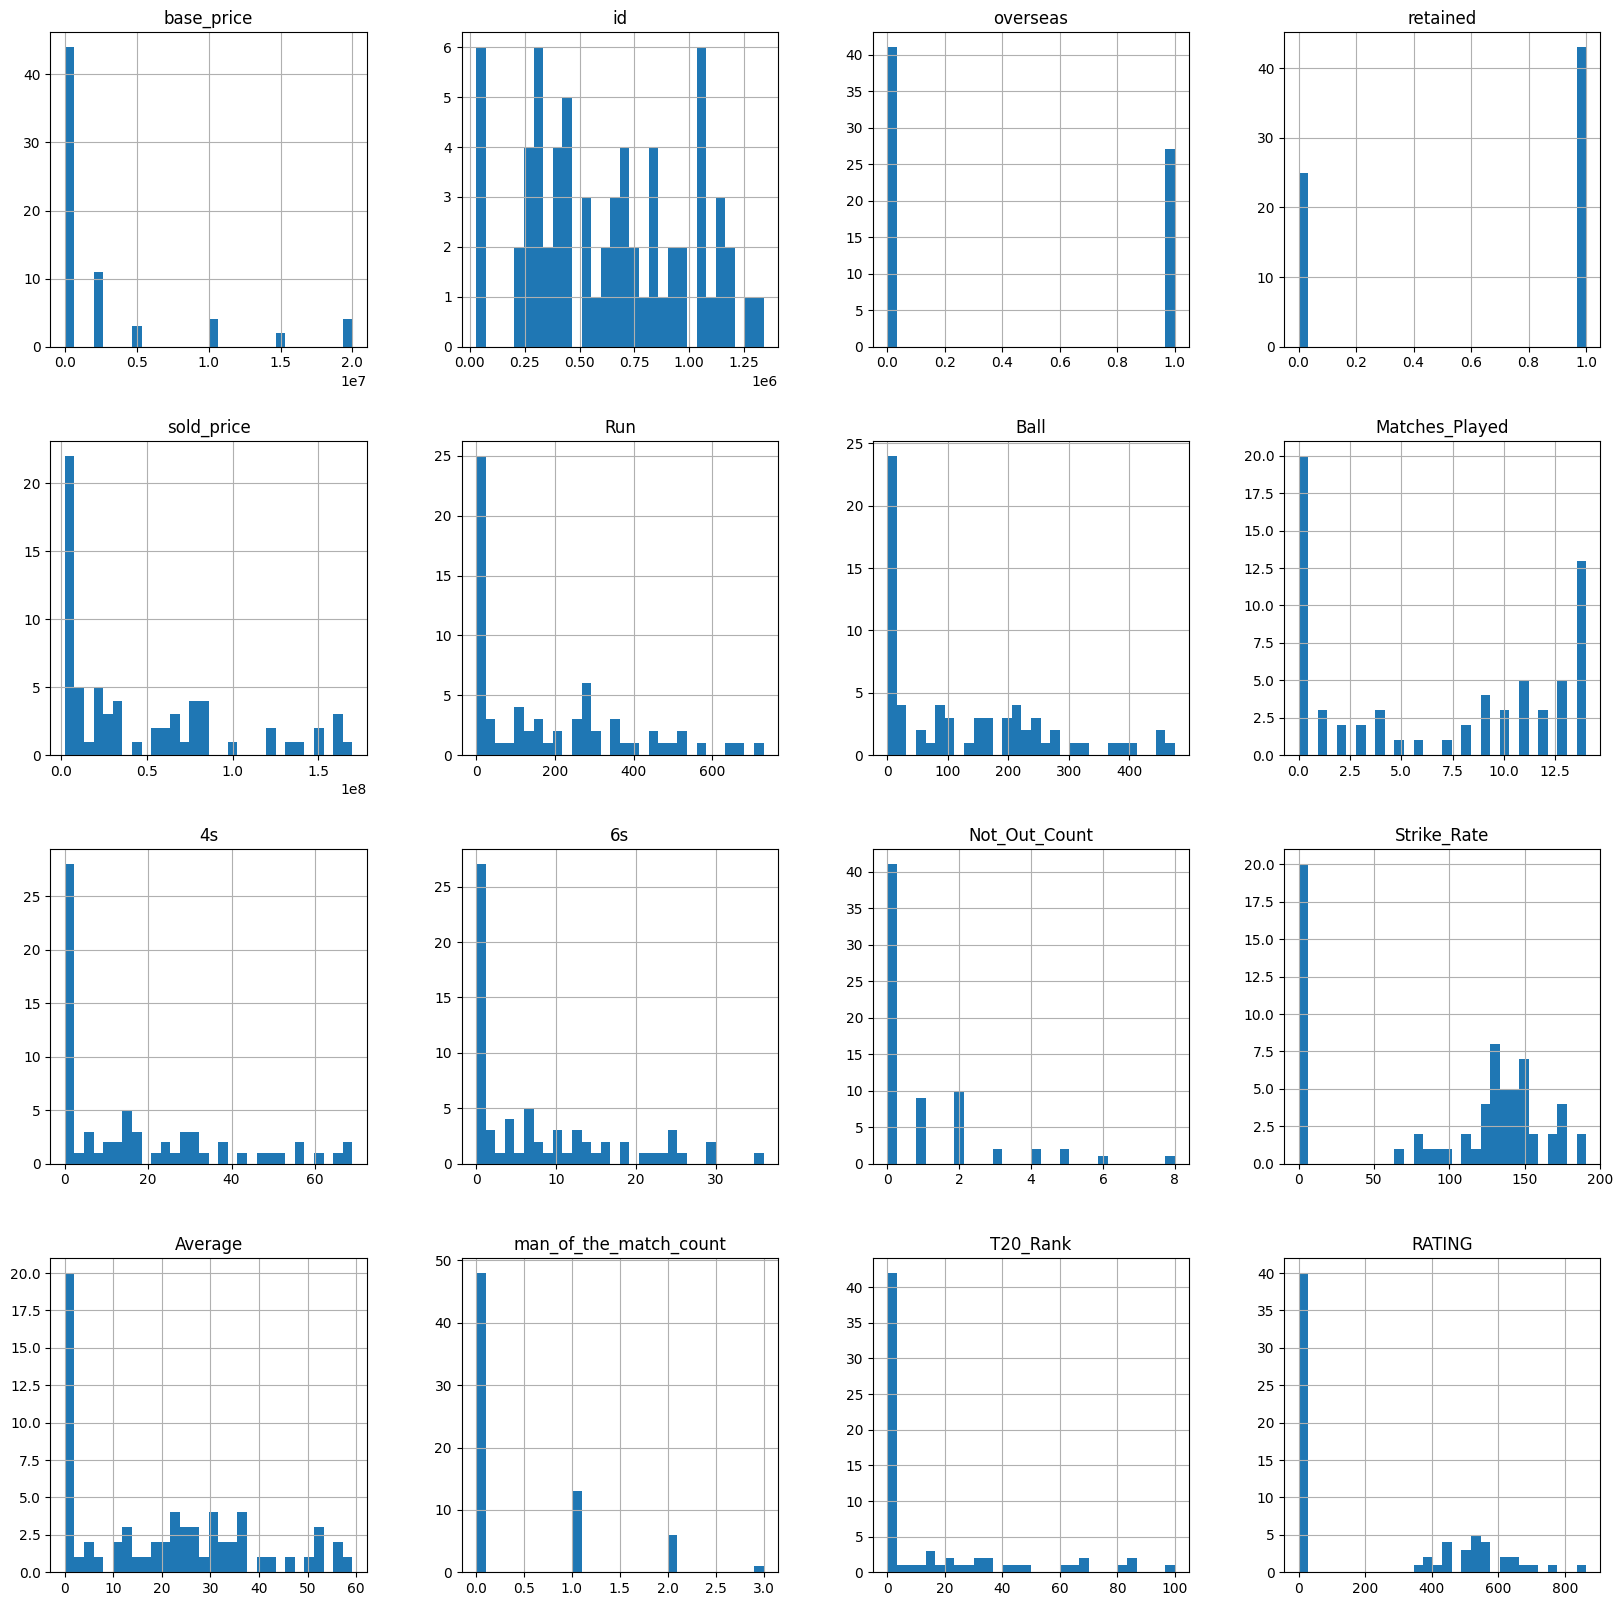

In [ ]:
batsman_merged_ranking_data.hist(bins=30,figsize=[20,20])

In [ ]:
# batsman_merged_ranking_data.to_csv('batsman_merged_ranking_data.csv', index = False)

## Run Linear Regression on DB1 + DB2

In [ ]:
pip install tabulate

In [ ]:
df = batsman_merged_ranking_data.copy()

# Define the target variable
target = 'sold_price'

# List of features you want to test one at a time
features_to_test = [
    'base_price', 'overseas', 'retained', 'Run',
    'Ball', 'Matches_Played', '4s', '6s', 'Not_Out_Count',
    'Strike_Rate', 'Average',
]

# Create an empty list to store DataFrames for each feature
results_dfs = []

# Loop through each feature and run linear regression
for feature in features_to_test:
    # Select the current feature as the independent variable
    X = df[[feature]]
    y = df[target]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating and training a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Create a DataFrame for the current feature's results
    feature_result = pd.DataFrame({'Feature': [feature], 'Mean Squared Error': [mse], 'R-squared': [r2]})

    # Append the DataFrame to the list
    results_dfs.append(feature_result)

# Concatenate the DataFrames into a single results DataFrame
results_df = pd.concat(results_dfs, ignore_index=True)

# Display the results in a table
table = tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False)
print(table)


+----------------+--------------------+-----------------------+
|    Feature     | Mean Squared Error |       R-squared       |
+----------------+--------------------+-----------------------+
|   base_price   | 2741899935318626.5 | -0.014828135286748978 |
|    overseas    | 2669178382918572.5 | 0.012087463078706229  |
|    retained    | 2467082509010432.0 |  0.08688690277580491  |
|      Run       | 2129383974400571.5 |  0.21187540791881554  |
|      Ball      | 2110524549356691.5 |  0.21885563170573386  |
| Matches_Played | 2692778532317474.5 | 0.0033526090825873878 |
|       4s       | 2075039268118560.0 |  0.23198939392847306  |
|       6s       | 2453891989342608.5 |  0.0917689593036648   |
| Not_Out_Count  | 2587742261364365.5 |  0.04222848548339042  |
|  Strike_Rate   | 2735752831991739.0 | -0.012552978076857846 |
|    Average     | 2265034066044115.5 |  0.16166878739963986  |
+----------------+--------------------+-----------------------+


Overseas, Reatined, run, ball, matches playes 4s, 6s, not_out count and average seems corelated with sold_price

# Muller Loop

In [ ]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def mullerloop_regression_models(df, target, potential_features):
    # Split the dataset into training and testing sets
    X = df[potential_features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define a dictionary of regression models
    models = {
        'LinearRegression': LinearRegression(),
        'RandomForestRegressor': RandomForestRegressor(),
        'KNNRegressor': KNeighborsRegressor(),
        'MLPRegressor': MLPRegressor(),
        'XGBoostRegressor': XGBRegressor()
    }

    results = []

    best_model_name = None
    best_mse = float('inf')
    best_r2 = -float('inf')
    best_features = []

    # Iterate through different combinations of features
    for num_features in range(1, len(potential_features) + 1):
        for feature_combination in combinations(potential_features, num_features):
            for model_name, model in models.items():
                # Creating and training the regression model
                model.fit(X_train[list(feature_combination)], y_train)

                # Making predictions on the test set
                y_pred = model.predict(X_test[list(feature_combination)])

                # Evaluate the model
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

                # Store the results
                results.append({
                    'Model': model_name,
                    'Features': list(feature_combination),
                    'Mean Squared Error': mse,
                    'R-squared': r2
                })

                # Check if this combination of features and model performs better
                if mse < best_mse:
                    best_mse = mse
                    best_r2 = r2
                    best_features = list(feature_combination)
                    best_model_name = model_name

    return results, best_model_name, best_features

### **Running Muller loop on Latent Variable - T20-ICC Rating**

In [ ]:
target_variable = 'sold_price'
potential_features_list = ['RATING']
results, best_model, best_features = mullerloop_regression_models(df, target_variable, potential_features_list)

# Print the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_model}")
print(f"Best Features: {best_features}")

Model: LinearRegression
Features: ['RATING']
Mean Squared Error: 2497801165688469.5
R-squared: 0.0755173569096228


Model: RandomForestRegressor
Features: ['RATING']
Mean Squared Error: 3538802557837519.5
R-squared: -0.30977660951762576


Model: KNNRegressor
Features: ['RATING']
Mean Squared Error: 2700942857142857.0
R-squared: 0.00033084069793776205


Model: MLPRegressor
Features: ['RATING']
Mean Squared Error: 4650309270023130.0
R-squared: -0.7211659055150192


Model: XGBoostRegressor
Features: ['RATING']
Mean Squared Error: 2407649910728482.5
R-squared: 0.10888401219355204


Best Model: XGBoostRegressor
Best Features: ['RATING']


###**Running linear regression on latent variable - T20_ICC Rating**

In [ ]:
# Define the target variable
target = 'sold_price'

# Select the features and the target variable
features = ['RATING']
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2497801165688469.5
R-squared: 0.0755173569096228


ICC_T20 rating is corealted with sold price better than previously available variables.

### **Running Muller loop on Latent Variable - Man of the match**

In [ ]:
target_variable = 'sold_price'
potential_features_list = ['man_of_the_match_count']
results, best_model, best_features = mullerloop_regression_models(df, target_variable, potential_features_list)

# Print the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Features: {result['Features']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")

# Print the best model and its features
print(f"Best Model: {best_model}")
print(f"Best Features: {best_features}")

Model: LinearRegression
Features: ['man_of_the_match_count']
Mean Squared Error: 2318942959705593.5
R-squared: 0.14171610374217003


Model: RandomForestRegressor
Features: ['man_of_the_match_count']
Mean Squared Error: 2792595701383547.0
R-squared: -0.03359158069184853


Model: KNNRegressor
Features: ['man_of_the_match_count']
Mean Squared Error: 3261871428571428.5
R-squared: -0.20727925069869335


Model: MLPRegressor
Features: ['man_of_the_match_count']
Mean Squared Error: 4650427943476135.0
R-squared: -0.7212098287659994


Model: XGBoostRegressor
Features: ['man_of_the_match_count']
Mean Squared Error: 2821560413181991.0
R-squared: -0.04431195895398132


Best Model: LinearRegression
Best Features: ['man_of_the_match_count']


###**Running linear regression on latent variable - Man of the match**

In [ ]:
# Define the target variable
target = 'sold_price'

# Select the features and the target variable
features = ['man_of_the_match_count']
X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2318942959705593.5
R-squared: 0.14171610374217003


Man of the match rating is corealted with sold price better than ICC rating.

**Atleast 5 matches played**

In [ ]:
filtered_df = df[df['Matches_Played'] > 5]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 2 to 67
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   team                    37 non-null     object 
 1   base_price              37 non-null     float64
 2   id                      37 non-null     int64  
 3   name                    37 non-null     object 
 4   overseas                37 non-null     int64  
 5   retained                37 non-null     int64  
 6   sold_price              37 non-null     int64  
 7   Run                     37 non-null     float64
 8   Ball                    37 non-null     float64
 9   Matches_Played          37 non-null     float64
 10  4s                      37 non-null     float64
 11  6s                      37 non-null     float64
 12  Not_Out_Count           37 non-null     float64
 13  Strike_Rate             37 non-null     float64
 14  Average                 37 non-null     floa

#Implement a Multi-Layer Perceptron Neural Network with Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df[[
 'base_price',
 'overseas',
 'retained',
 'Run',
 'Ball',
 'Matches_Played',
 '4s',
 '6s',
 'Not_Out_Count',
 'Strike_Rate',
 'Average',
 'man_of_the_match_count',
 'T20_Rank',
 'RATING']].values
y = df['sold_price'].values

# Define the Keras model
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))  # Adjust input_dim to match the number of features
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use 'linear' for regression

# Compile the Keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])  # Use mean squared error for regression

# Fit the Keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)  # Adjust epochs and batch_size as needed

# Make predictions with the model
predictions = model.predict(X)

# Summarize the first 5 cases
for i in range(15):
    print('%s => %.2f (expected %.2f)' % (X[i].tolist(), predictions[i][0], y[i]))


3/3 [==============================] - 0s 6ms/step
[2000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] => 6792176.50 (expected 9000000.00)
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] => 52.91 (expected 2000000.00)
[0.0, 0.0, 1.0, 581.0, 397.0, 13.0, 48.0, 29.0, 2.0, 146.34760705289673, 52.81818181818182, 1.0, 85.0, 400.0] => 44307.46 (expected 60000000.00)
[0.0, 0.0, 1.0, 106.0, 85.0, 8.0, 16.0, 1.0, 0.0, 124.70588235294117, 13.25, 0.0, 0.0, 0.0] => 8963.01 (expected 80000000.00)
[0.0, 0.0, 1.0, 680.0, 446.0, 14.0, 67.0, 22.0, 2.0, 152.46636771300447, 56.666666666666664, 3.0, 34.0, 524.0] => 50713.50 (expected 80000000.00)
[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] => 76.71 (expected 30000000.00)
[0.0, 0.0, 1.0, 261.0, 200.0, 11.0, 31.0, 6.0, 1.0, 130.5, 26.1, 1.0, 0.0, 0.0] => 17119.99 (expected 77500000.00)
[0.0, 0.0, 1.0, 91.0, 71.0, 7.0, 6.0, 4.0, 4.0, 128.16901408450704, 30.333333333333332, 0.0, 0.0, 0

The model predictions are very inaccurate.